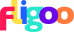

<hr>
<p style="font-size:40px;text-align:center">Take Home - Data Science</p>
<hr>

# The Hotel Bookings Data
Let’s use hotel bookings data from [Antonio, Almeida, and Nunes (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub) to predict which hotel stays included children and/or babies, based on the other characteristics of the stays such as which hotel the guests stay at, how much they pay, etc.

<img src="https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/header.png"/>

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 23 variables describing the 19248 observations of H1 and 30752 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or customer identification were deleted.

**Take-Home Goals**

#### Part 1
During **Part I**, you should perform an Exploratory Data Analysis highlighting key findings:
  - Data Quality Check: You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data if any.
  - Report insights and conclusions: Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by plots / tables / metrics.
  - **Expected**:
    - Make at least 10 plots with any plotting library (plotly, matplotlib, seaborn, etc.)
    - Write down the conclusions, in a clear manner, of every plot in this notebook

#### Part 2
In **Part II** you should define and train a model to predict which actual hotel stays included children/babies, and which did not:
  - **Feature extraction:** Indicate some possible candidates of features that could properly describe the hotels, either from the given columns or from their transformations.
      - **Expected**:
        - Create **one** scikit-learn pipeline inside a file called `pipelines.py`
        - Create at least **three** scikit-learn transformers inside a file called `transformers.py` and use them inside the pipeline from previous step. This transformers should add new features or clean the original dataframe of this take-home
          - Feature example: Compute "total_nights" feature. This is the sum of `stays_in_week_nights` + `stays_in_weekend_nights`
          - Cleaning example: Transform string values. `'0'` to int type `0` 
        - Import pipeline and run the transformations inside this notebook

  - **Machine Learning modeling:** Fit models with the given data. Pay attention to the entire process to avoid missing any crucial step. You could use the `children` column as target.
    - **Expected**:
      - Use the dataset with the new features generated to train *at least* **three** different machine learning models and generate metrics about their performance.
    
#### Part 3
Finally, on **Part III** you should present the key findings, conclusions and results to non-technical stakeholders.
  - **Expected**:
    - Create a summary of all the findings in part 1
    - Create an explanation of the features added in part 2
    - Create a summary of the model metrics
    - These explanations should be at high level and understood by a non-technical person
    - You can add all the summaries and explanations at the end of this notebook, it can be done in markdown format or any other external resource like a ppt presentation, pdf document, etc. Whatever works best for you!

 
**Requirements**
- Python 3.x & Pandas 1.x
- Paying attention to the details and narrative is far way more important than extensive development.
- Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) or share the repository link.
- Virtualenv, requirements or Conda environment for isolation.
- Have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.
- Finally, but most important: Have fun!

**Nice to have aspects**
- Code versioning with Git (you are free to publish it on your own Github/Bitbucket account!).
- Show proficiency in Python: By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.
- Shap Model explainability: explain feature importance with the use of shapley values

## Part I - Exploratory Data Analysis

In [ ]:
import pandas as pd
# from pipelines import <your_pipeline_name>
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import numpy as np

hotels = pd.read_csv('https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/hotels.csv')

In [ ]:
hotels.head()

In [ ]:
hotels.describe()

In [ ]:
hotels.info()

In [ ]:
hotels.hotel.value_counts()

In [ ]:
# converting the arrival_date dtype from object to datetime:
hotels["arrival_date"] = pd.to_datetime(hotels["arrival_date"])

In [ ]:
hotels.children.value_counts()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=hotels, x='children', hue='children', palette='Set2')
plt.title('Number of Bookings with Children')
plt.xlabel('Children Value')
plt.ylabel('Number of Bookings')
plt.show()

The entire dataset is dominated by observations where there are no children, we call this behavior of the target variable "class imbalance".

### about the target variable:
we see the children column(which is the target variable) is a categorical variable, we are not interested on knowing how many children will there be, we are just interested on knowing if there'll be any children or not, this defines the problem as classification problem.

In [ ]:
hotels[hotels['country'].isna()].hotel.value_counts()

In [ ]:
hotels[hotels['hotel'] == "Resort_Hotel"].country.value_counts(dropna=False).head(25)

In [ ]:
country_counts = hotels[hotels['hotel'] == "Resort_Hotel"].country.value_counts(dropna=False).head(25)
country_counts.index = country_counts.index.fillna('Missing')
plt.figure(figsize=(14, 7))

colors = ['skyblue' if country != 'Missing' else 'salmon' for country in country_counts.index]

bars = plt.bar(country_counts.index, country_counts.values, color=colors)

plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.title('Number of Bookings by Country for Resort Hotel', fontsize=16)

plt.xticks(rotation=90)

# add counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5, 
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.show()

### Number of Bookings by Country for Resort Hotel plot
the main idea of the plot from above is to understand in which part of the distribution of the resort hotel do the missing values fall, actually fall, we actually end up seeing with this how it compares to the rest of the, it ends up being one of the top countries for the resort hotel.

In [ ]:
hotels[hotels.hotel == "Resort_Hotel"].mean()

In [ ]:
hotels[(hotels.hotel == "Resort_Hotel") & (hotels.country.isna())].mean()

### about the few null values in the country column:
there is just one column with nulls, this columns is country and from 50000 observations we can find only 289 nulls, which is almost 0.6%, after seeing the means of rows with nulls and rows without nulls, I would guess that the distribution of rows with nulls come from a different distribution and the missingness is not at random, this would normally point to the NAs being an actual source of extra information, it begs the question: why are these values null? there can be many reasons for that, but I think the best step to take those rows seriously would be to analyze the way the data was collected initially, maybe if the origin countries of the bookers dissolved (like yugoslavia) then it made more sense to keep it blank as the country code was deprecated, it could also be interesting to apply a model to predict these countries and analyze the results. because it actually is a very small percentage of the dataset I think it would make sense to test the actual missingness of a values as another value of the country column.

In [ ]:
hotels['country_missing'] = hotels['country'].isnull()

In [ ]:
hotels.duplicated().sum()

### about duplicates:
I don't think this is a dataset in which we have to worry about duplicates, because each observation is a stay, and because we don't a booker_id variable, we can assume that each duplicate is a booking from a different person, of the same duration, with the same arrival date, of the same country, and so on.

In [ ]:
def plot_columns(data: pd.DataFrame):
    color_palette = {
        'children': '#1f77b4',
        'none': '#ff7f0e'
    }

    target = 'children'
    excluded_columns = [target, 'arrival_date', 'country_missing']

    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'bool', 'datetime64[ns]']).columns.tolist()

    numerical_cols = [col for col in numerical_cols if col not in excluded_columns]
    categorical_cols = [col for col in categorical_cols if col not in excluded_columns]

    print(f"Numerical Columns: {numerical_cols}")
    print(f"Categorical Columns: {categorical_cols}")

    cols = 3
    total_vars = len(numerical_cols) + len(categorical_cols)
    rows = math.ceil(total_vars / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    def plot_numerical(ax, col):
        sns.histplot(
            data=data, 
            x=col, 
            hue=target, 
            element='step', 
            stat='density',
            common_norm=False, 
            alpha=0.5, 
            ax=ax,
            palette=color_palette, # apply color palette
            hue_order=['children', 'none']
        )
        ax.set_title(f'Distribution of {col} by Children')
        ax.set_xlabel(col)
        ax.set_ylabel('Density')

    def plot_categorical(ax, col):
        counts = data.groupby([col, target]).size().reset_index(name='counts')
        
        max_categories = 10
        if counts[col].nunique() > max_categories:
            top_categories = counts[col].value_counts().nlargest(max_categories).index
            counts = counts[counts[col].isin(top_categories)]
            counts[col] = counts[col].astype(str)
        
        counts['relative_freq'] = counts['counts'] / counts.groupby(target)['counts'].transform('sum')
        
        sns.barplot(
            data=counts, 
            x=col, 
            y='relative_freq', 
            hue=target, 
            alpha=0.7, 
            ax=ax,
            palette=color_palette,  # apply color palette
            hue_order=['children', 'none']
        )
        ax.set_title(f'Distribution of {col} by Children')
        ax.set_xlabel(col)
        ax.set_ylabel('Relative Frequency')
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title=target)

    # plot numerical columns
    index = 0
    for col in numerical_cols:
        if index >= len(axes):
            break
        plot_numerical(axes[index], col)
        index += 1

    # plot categorical columns
    for col in categorical_cols:
        if index >= len(axes):
            break
        plot_categorical(axes[index], col)
        index += 1

    # delete unused axes (if there is any)
    for i in range(index, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

In [ ]:
plot_columns(hotels)

### Plots of relative frequency
The above plots of relative frequency can be used to compare how the distributions behave side by side. For example, when examining the plots titled "Distribution of average_daily_rate by Children," "Distribution of adults by Children," "Distribution of country by Children," and "Distribution of reserved_room_type by Children," we can see very different behaviors between the distributions where Children = "none" and Children = "children." While the absolute distributions can be very different due to class imbalance, these relative frequency graphs can tell us a lot about the proportion differences.

There are also extreme outliers in the dataset. To deal at least somewhat with the most extreme cases, let's remove them from the dataset.

In [ ]:
z_scores = stats.zscore(hotels.select_dtypes(include=[float, int]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 5).all(axis=1) # Cut the outliers that are 5 standard deviations away from the mean.
clean_hotels = hotels[filtered_entries]

In [ ]:
plot_columns(clean_hotels)

These are the final distribution plots, updated with the removed outliers.

In [ ]:
# converting the arrival_date dtype from object to datetime
hotels["arrival_date"] = pd.to_datetime(hotels["arrival_date"])

## Data Quality check
The quality of the data is very close to ideal, the missing values are pretty much non-existant which makes a very clean dataset, and even the few nulls(0.6%) found can have some predictive power. The presence of outliers can be easily detected when looking at the distribution plots and looks like the place where there is some work to do. Also, duplicates definitely make sense in this dataset.

#### Corrective actions
+ Utilized Z-score analysis to identify extreme outliers in numerical features.
+ Converted arrival_date from dtype object to datetime

## Insights
+ We can find class imbalance in target variable (~1:11).
+ The nulls in the country column look very interesting, there are not that many and it looks like they could potentially have some predictive power as they are definitely not missing at random. 
+ If we define two datasets, one with children = "children" and another with children = "none", we find very different behaviors in some of the relative distributions. From this piece of information one can expect good predictive power from a model.

## Conclusion
+ Dataset quality is High.
+ High expectations of predictive power.
+ Only a low number of missing values, may require to research the data source.

With the understanding that this is an important problem to solve and that we find ways to work through it, we'll be proceeding to work through the modeling phase.

## Part II - Modeling

We will build the best model to predict which actual hotel stays included children/babies, and which did not:

In [ ]:
#
# Develop Machine/Statistical Learning models to predict the target variable...
#

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from pipelines import create_pipeline

In [ ]:
X = hotels.drop('children', axis=1)
y = hotels['children'].map({'children': 1, 'none': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

pipeline = create_pipeline()
pipeline.fit(X_train)

X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
}

model_performance = {}
target_names = ["No Children", "Children Included"]
model_metrics = []

for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    
    y_pred = model.predict(X_test_transformed)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_transformed)[:, 1]
    else:
        y_proba = model.decision_function(X_test_transformed)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    auc = roc_auc_score(y_test, y_proba)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    
    model_metrics.append({
        'Model': name,
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1-Score': round(f1_score, 2),
        'AUC': round(auc, 2)
    })
    
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("\n")

metrics_df = pd.DataFrame(model_metrics)

print("Model Performance Summary:")
print(metrics_df)

In [ ]:
print("Model Metrics Summary:")
print(metrics_df)

## Part III - Results & Conclusions

In [ ]:
#
# List your key insights / findings and conclusions...
#

## Summary of EDA
High Data Quality: The dataset is predominantly complete, with only a minimal percentage (0.6%) of missing values in the country column. This low level of missing data ensures reliability in our analysis and modeling efforts.

No need to manage duplicates: Each record represents a unique hotel stay, eliminating concerns about duplicate entries that could skew results.

Outliers Managed: Extreme values in numerical features were identified and appropriately handled to prevent distortions in the analysis and model performance.

Class Imbalance: The majority of hotel bookings do not include children (children = none). Specifically, the ratio is approximately 1:11, indicating that only about 9% of bookings involve children. This imbalance is crucial as it affects how models learn and predict outcomes.

## Explanation of features added
Number of Adults (adult_is_0 and adult_is_1): two variables have been created from the number of adults. one that tells us if there are no adults in the booking, and another that tells us if there is one adult in the booking.

Number of special requests (total_of_special_requests): Two variables have been created from the number of special requests, one of these variables recognizes if the number of special requests is 0 and the other recognizes if the number of special requests is 2 or more.

Distribution Channel (distribution_channel): Two variables have been created, one recognizing if the booking's distribution channel is corporate and the other recognizing if its distribution channel is direct.

Data Type Conversions: Ensured that all features are in appropriate numeric formats, facilitating seamless integration with machine learning models.

## Model Metrics Summary
Four distinct models were developed to predict the presence of children in hotel bookings, here you can find a summary of the models' metrics:

| Model              | Precision | Recall   | F1-Score | AUC  |
| ------------------ | --------- | -------- | -------- | ---- |
| LogisticRegression | 0.69      | 0.35     | 0.46     | 0.84 |
| DecisionTree       | 0.72      | 0.34     | 0.46     | 0.79 |
| XGBoost            | 0.28      | 0.69     | 0.40     | 0.84 |
| RandomForest       | 0.53      | 0.44     | 0.48     | 0.79 |